In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt


In [75]:
df = pd.read_csv("tracks.csv", index_col=0)
df = df.drop('track_genre', axis=1)
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (1500, 14)


In [76]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [77]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [78]:
k = 3

In [79]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [80]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [81]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


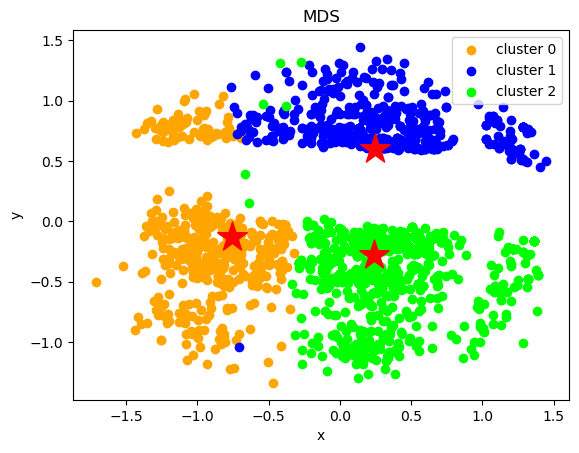

In [82]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [83]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


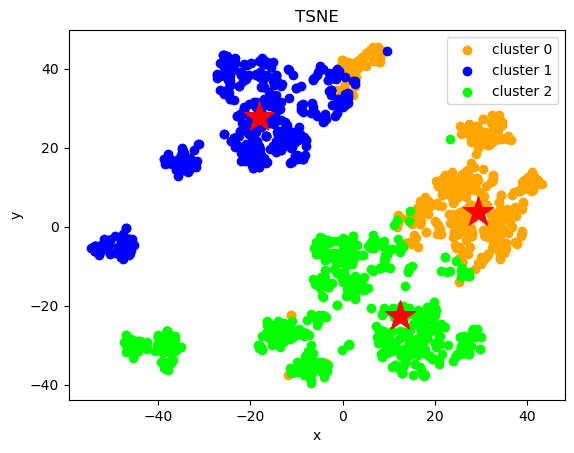

In [84]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [85]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [86]:
df.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
popularity,,,,,,,,,,,,,,,
85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,2
49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,2
65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,1
59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,1
55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,2


In [87]:
df.tail()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
popularity,,,,,,,,,,,,,,,
23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,0
22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,0
23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,0
23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,0
23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,0


In [88]:
df.groupby('cluster').mean()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
0,226790.365116,0.000000,0.309294,0.259449,4.767442,-14.605663,0.855814,0.044661,0.871512,0.217205,0.199045,0.203678,103.134105,3.665116
1,206810.516411,0.148796,0.625899,0.703247,5.776805,-6.001947,0.000000,0.091867,0.164083,0.093648,0.189492,0.438739,118.577667,3.962801
2,199980.618271,0.145188,0.640409,0.748157,4.690049,-5.619463,1.000000,0.089768,0.117714,0.185494,0.195895,0.456339,125.365556,3.969005


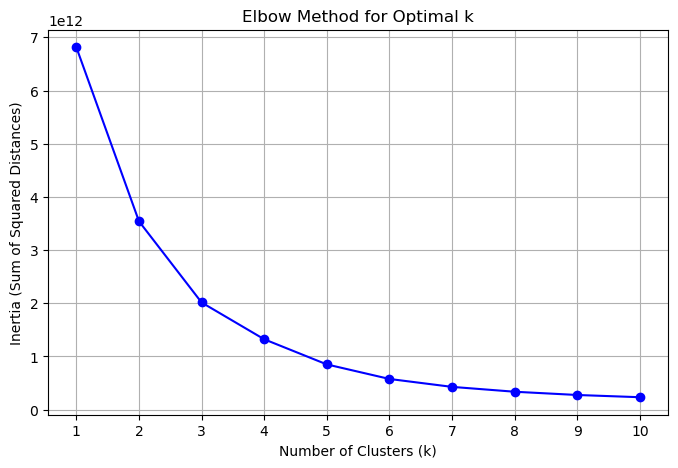

In [89]:
##Elbow method

##To figure out the best number of k to use, I will employ the use of the elbow method to measure the number for k at which adding more clusters doesnt significantly reduce the inetria

k_values = range(1, 11)  
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)  
    inertia_values.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Silhouette Scores for Different k values:
k = 2: 0.5463
k = 3: 0.5276
k = 4: 0.5279
k = 5: 0.5301
k = 6: 0.5300
k = 7: 0.5225
k = 8: 0.5409
k = 9: 0.5443
k = 10: 0.5440


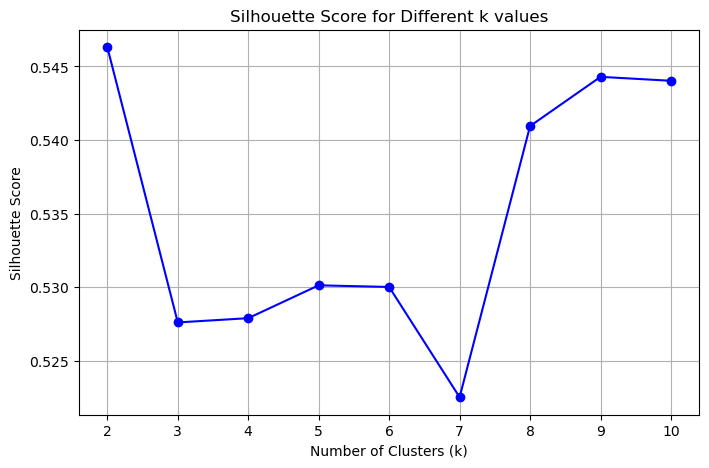

In [90]:

k_values = [2, 3, 4,5,6,7,8,9,10]  
silhouette_scores = {}


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df)  # Apply clustering
    silhouette_scores[k] = silhouette_score(df, cluster_labels)  # Compute silhouette score


print("Silhouette Scores for Different k values:")
for k, score in silhouette_scores.items():
    print(f"k = {k}: {score:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(k_values, list(silhouette_scores.values()), marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

DBSCAN Cluster Counts:
DBSCAN_Cluster
-1     1092
 43      16
 61      15
 5       14
 30      14
       ... 
 35       3
 4        3
 62       3
 24       3
 34       3
Name: count, Length: 76, dtype: int64
Silhouette Score for DBSCAN: 0.0545


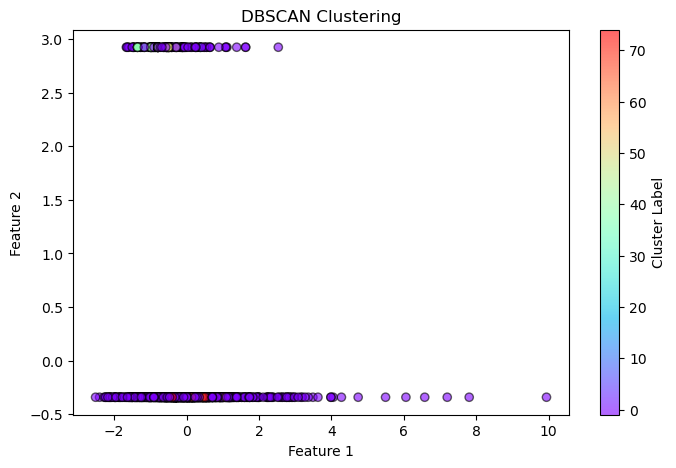

In [91]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


dbscan = DBSCAN(eps=1.0, min_samples=3) 
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

print("DBSCAN Cluster Counts:")
print(df["DBSCAN_Cluster"].value_counts())


if -1 in df["DBSCAN_Cluster"].values:
    dbscan_clusters = df[df["DBSCAN_Cluster"] != -1]["DBSCAN_Cluster"]
    dbscan_data = df[df["DBSCAN_Cluster"] != -1].iloc[:, :-1]  # Exclude outliers
    silhouette_dbscan = silhouette_score(dbscan_data, dbscan_clusters)
else:
    silhouette_dbscan = silhouette_score(df.iloc[:, :-1], df["DBSCAN_Cluster"])

print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}")



plt.figure(figsize=(8, 5))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df["DBSCAN_Cluster"], cmap="rainbow", alpha=0.6, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Label")
plt.show()


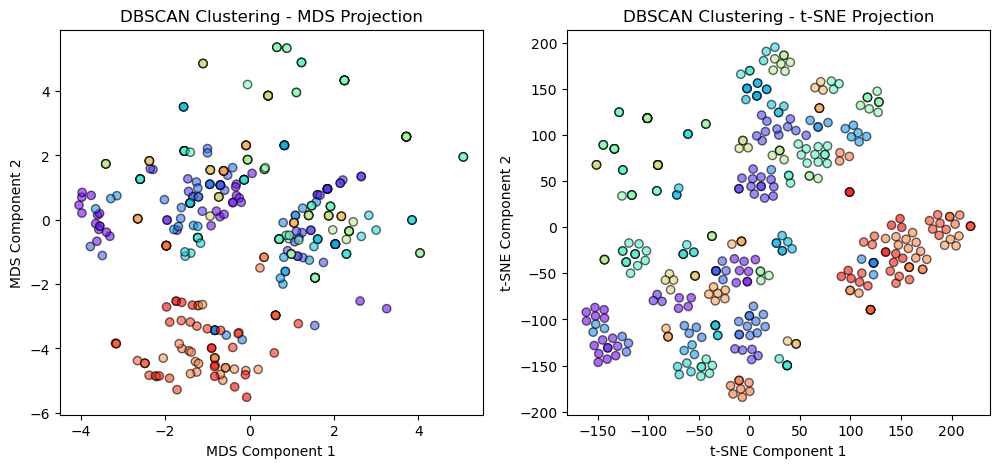

In [92]:
dbscan_filtered = df[df["DBSCAN_Cluster"] != -1]


dbscan_scaled_filtered = scaler.transform(dbscan_filtered.drop(columns=["DBSCAN_Cluster"]))


mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)


mds_coordinates = mds.fit_transform(dbscan_scaled_filtered)
tsne_coordinates = tsne.fit_transform(dbscan_scaled_filtered)


dbscan_labels = dbscan_filtered["DBSCAN_Cluster"]


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].scatter(mds_coordinates[:, 0], mds_coordinates[:, 1], c=dbscan_labels, cmap="rainbow", alpha=0.6, edgecolors="k")
axes[0].set_title("DBSCAN Clustering - MDS Projection")
axes[0].set_xlabel("MDS Component 1")
axes[0].set_ylabel("MDS Component 2")

# t-SNE Plot
axes[1].scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1], c=dbscan_labels, cmap="rainbow", alpha=0.6, edgecolors="k")
axes[1].set_title("DBSCAN Clustering - t-SNE Projection")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.show()
